In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from motion.gca import GCA
from conics.orbitals import Orbitals 
from query.orbitals import MajorBodyQuery

1. Demuestre que el movimiento de un planeta sobre una órbita elíptica con semieje mayor $a$ y excentricidad $e$ (con $e\ll 1$) es equivalente al que se produce al combinar el movimiento de un punto P sobre un círculo de radio $a$ centrado en el foco, y el del planeta sobre una elipse con semiejes mayor $2ae$ y menor $ae$ con centro en el punto P (ver Figura 2.8 en MD2.6), ambos movimientos con la misma frecuencia angular $n$ de la órbita original. A esta equivalencia se la llama *la aproximación del centro guía* (en lo sucesivo la abreviaremos como ACG)

In [ ]:
gca = GCA()
gca.proof()

2. Escriba una rutina para calcular la posición del planeta usando la ACG (escoga un valor arbitrario de $a$ y $e$ para este propósito). Haga una animación del movimiento del planeta con la ACG y compare la predicción de la posición con aquella que se obtiene resolviendo el problema de los dos cuerpos con la ecuación de Kepler. Estudie la calidad de la ACG al aumentar el valor de la excentricidad.

El movimiento del planeta esta descrito entonces por:

$$
\vec{r} = \vec{r_G} + \vec{r_P}
$$

Dado que se requiere un cuerpo con baja excentricidad, se tomara como ejemplo el planeta venus. Sus parametros a continuacion:

In [3]:
venus_params = MajorBodyQuery(299, ['a', 'e'])
venus_params

a    0.723334
e    0.006748
dtype: float64

Se tiene entonces que:

$$
\vec{r_G} = a\cos{(nt)}\hat{i} + a\sin{(nt)}\hat{j}\\
\vec{r_P} = ae\cos{nt}\hat{i} + 2ae\sin{nt}\hat{j}
$$ 

Así, con los datos obtenidos, es posible contruir los vectores de movimiento:

In [4]:
gca.a, gca.e, gca.n = venus_params['a']*gca.AU, venus_params['e'], np.sqrt(gca.mu/ venus_params['a']**3)#*gca.day2sec*gca.rad2deg
gca.__params__()

{'semimajor': np.float64(108210833394.47931),
 'semiminor': 0,
 'eccentricity': np.float64(0.006747531860993332),
 'focus': 0,
 'latus_rectum': 0,
 'directrix': 0,
 'mean_angular_velocity': np.float64(18728868094.765697),
 'true_anomaly': 0,
 'eccentric_anomaly': 0,
 'mean_anomaly': 0}

In [5]:
gca.time = np.linspace(0, 2*np.pi, 1000)
r_Gs, v_Gs, r_Ps, v_Ps = gca.decompose()
r = r_Gs + r_Ps
v = v_Gs + v_Ps
r, v

(array([[ 1.09671145e+11,  0.00000000e+00,  0.00000000e+00],
        [-2.69561690e+10, -1.05598993e+11,  0.00000000e+00],
        [-9.64199837e+10,  5.19105420e+10,  0.00000000e+00],
        ...,
        [-6.14977325e+10,  9.02017671e+10,  0.00000000e+00],
        [ 1.03135930e+11,  3.70443455e+10,  0.00000000e+00],
        [ 1.07996113e+10, -1.08411510e+11,  0.00000000e+00]]),
 array([[-0.00000000e+00,  2.04034142e+21,  0.00000000e+00],
        [ 1.97774961e+21, -5.01497344e+20,  0.00000000e+00],
        [-9.72225694e+20, -1.79381446e+21,  0.00000000e+00],
        ...,
        [-1.68937700e+21, -1.14411471e+21,  0.00000000e+00],
        [-6.93798660e+20,  1.91875911e+21,  0.00000000e+00],
        [ 2.03042486e+21,  2.00917882e+20,  0.00000000e+00]]))

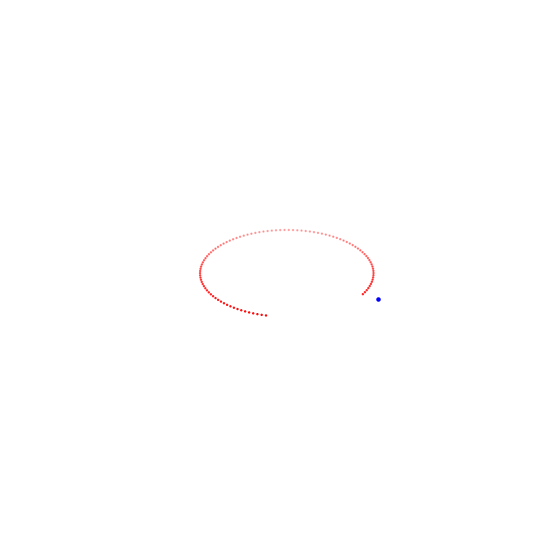

In [36]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

# Example data
a = 1.0
e = 0.1
n = 0.5
time = np.linspace(0, 10, 100)

r_G = lambda a, n, t: np.array([a * np.cos(n * t), a * np.sin(n * t), 0])
r_P = lambda a, e, n, t: np.array([2 * a * e * np.cos(n * t), a * e * np.sin(n * t), 0])

r_Gs = np.array([r_G(a, n, t) for t in time])
r_Ps = np.array([r_P(a, e, n, t) for t in time])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

def update(t):
    ax.clear()
    ax.scatter3D(r_Gs[:, 0], r_Gs[:, 1],
                  r_Gs[:, 2], c='r', marker='o', s=.5)
    
    ax.scatter3D(r_Ps[t, 0] + r_Gs[t, 0],
                  r_Ps[t, 1] + r_Gs[t, 1],
                    r_Ps[t, 2] + r_Gs[t, 2],
                      c='b', marker='o', s=5)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_axis_off()

    return ax

ani = FuncAnimation(fig, update, frames=len(time), interval=100)
ani.save('test.gif', fps=10)